# IRIS FLOWER CLASSIFICATION
Iris flower has three species; setosa, versicolor, and virginica, which differs according to their measurements.
Now assume that you have the measurements of the iris flowers according to their species, 
and here your task is to train a machine learning model that can learn from the measurements of the 
iris species and classify them.
Although the Scikit-learn library provides a dataset for iris flower classification, 
you can also download the same dataset from here for the task of iris 
flower classification with Machine Learning.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load Iris.csv into a pandas dataFrame.
df = pd.read_csv("Iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
print (df.shape)

(150, 6)


In [4]:
print (df.columns)

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


In [5]:
df["Species"].value_counts()
# balanced-dataset vs imbalanced datasets
#Iris is a balanced dataset as the number of data points for every class is 50.

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

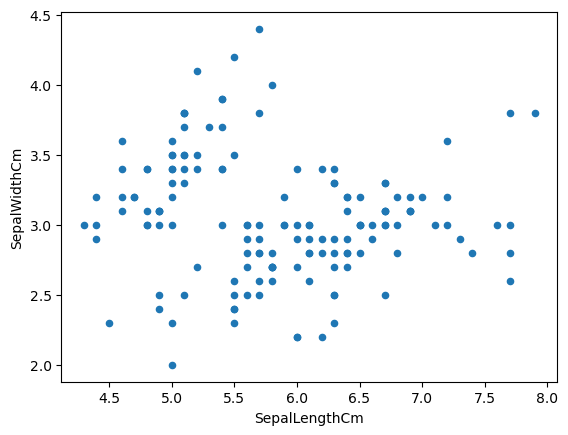

In [6]:
#2-D scatter plot:
#ALWAYS understand the axis: labels and scale.

df.plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm') ;
plt.show()

#cannot make much sense out it. 
#What if we color the points by thier class-label/flower-type.

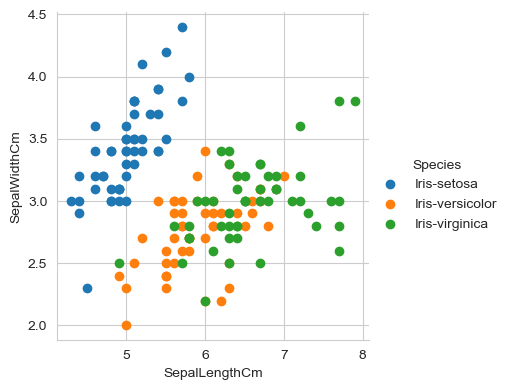

In [7]:
# 2-D Scatter plot with color-coding for each flower type/class.
# Here 'sns' corresponds to seaborn. 
sns.set_style("whitegrid");
sns.FacetGrid(df, hue="Species", height=4) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend();
plt.show();



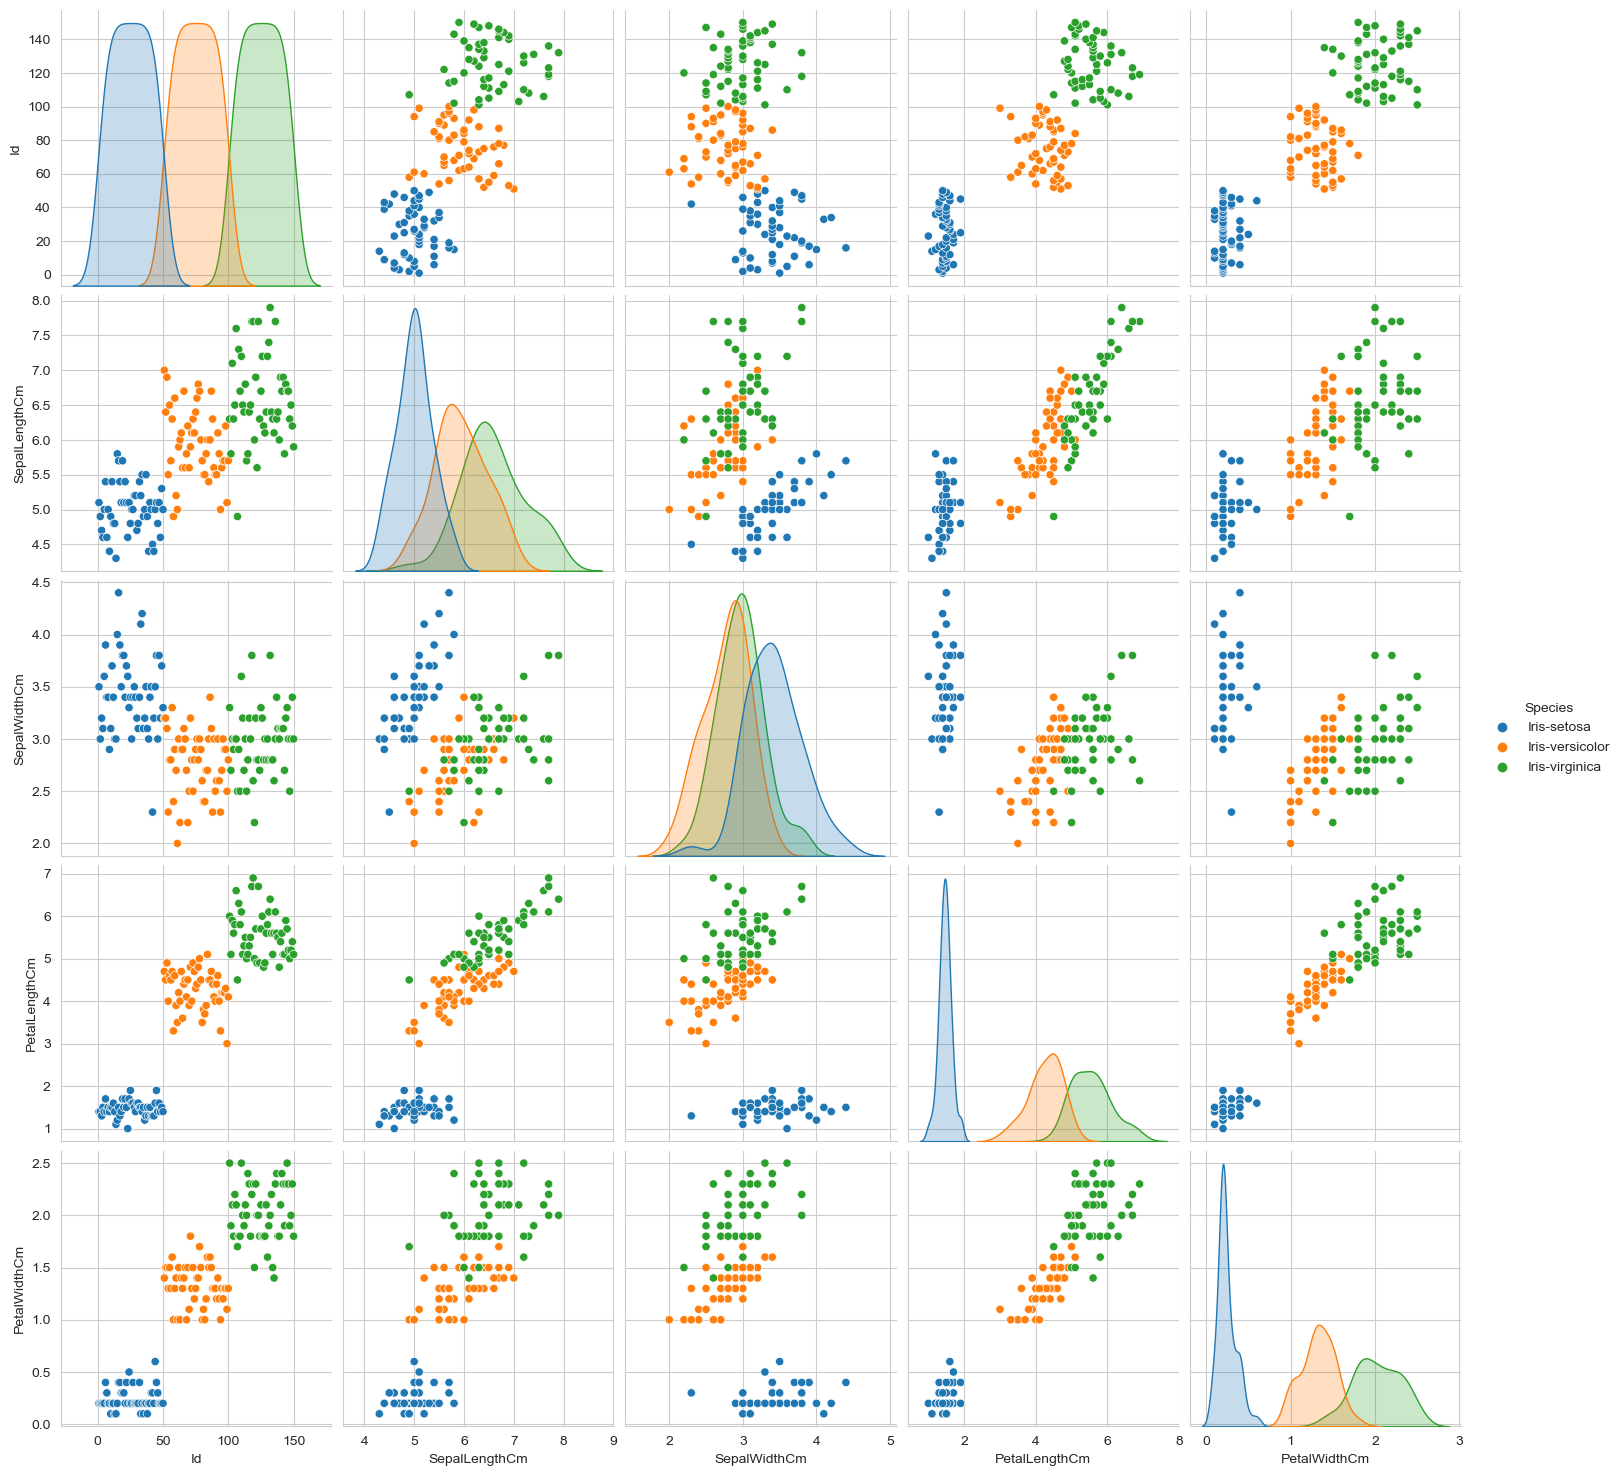

In [8]:
# pairwise scatter plot: Pair-Plot 
##Can be used when number of features are high.
##Cannot visualize higher dimensional patterns in 3-D and 4-D. 
#Only possible to view 2D patterns.
plt.close();
sns.set_style("whitegrid");
sns.pairplot(df, hue="Species", height=3);
plt.show()


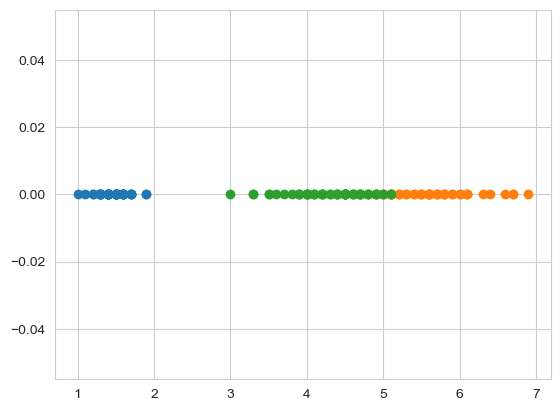

In [9]:
# What about 1-D scatter plot using just one feature?
#1-D scatter plot of petal-length
import numpy as np
iris_setosa = df.loc[df["Species"] == "Iris-setosa"];
iris_virginica = df.loc[df["Species"] == "Iris-versicolor"];
iris_versicolor = df.loc[df["Species"] == "Iris-virginica"];
#print(iris_setosa["petal_length"])
plt.plot(iris_setosa["PetalLengthCm"], np.zeros_like(iris_setosa['PetalLengthCm']), 'o')
plt.plot(iris_versicolor["PetalLengthCm"], np.zeros_like(iris_versicolor['PetalLengthCm']), 'o')
plt.plot(iris_virginica["PetalLengthCm"], np.zeros_like(iris_virginica['PetalLengthCm']), 'o')

plt.show()

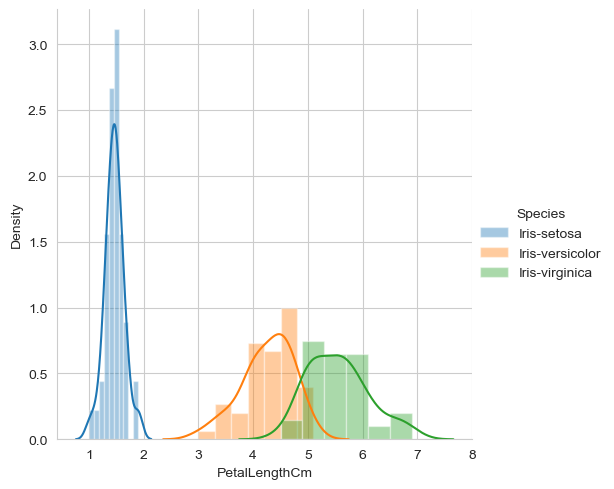

In [10]:
sns.FacetGrid(df, hue="Species", height=5) \
   .map(sns.distplot, "PetalLengthCm") \
   .add_legend();
plt.show();



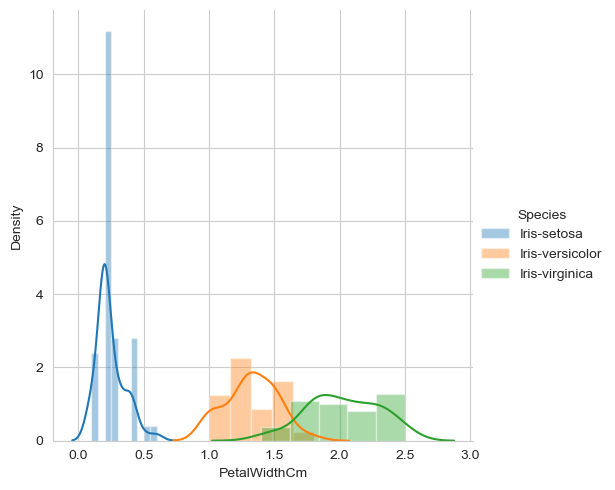

In [11]:
sns.FacetGrid(df, hue="Species", height=5) \
   .map(sns.distplot, "PetalWidthCm") \
   .add_legend();
plt.show();

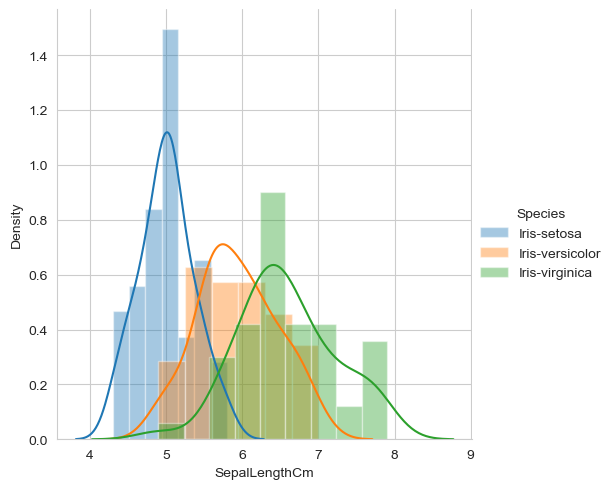

In [12]:
sns.FacetGrid(df, hue="Species", height=5) \
   .map(sns.distplot, "SepalLengthCm") \
   .add_legend();
plt.show();

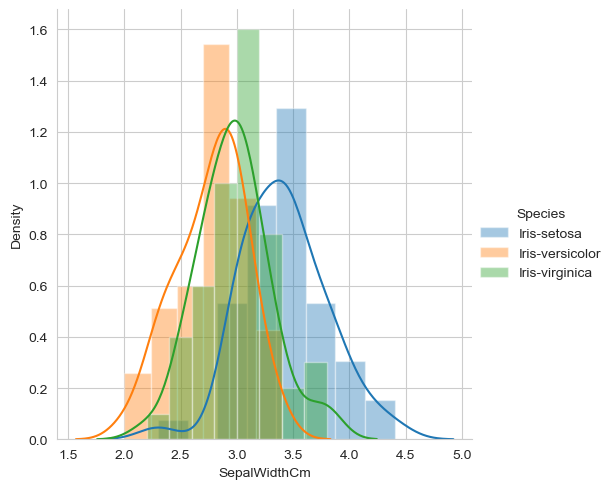

In [13]:
sns.FacetGrid(df, hue="Species", height=5) \
   .map(sns.distplot, "SepalWidthCm") \
   .add_legend();
plt.show();

[0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]


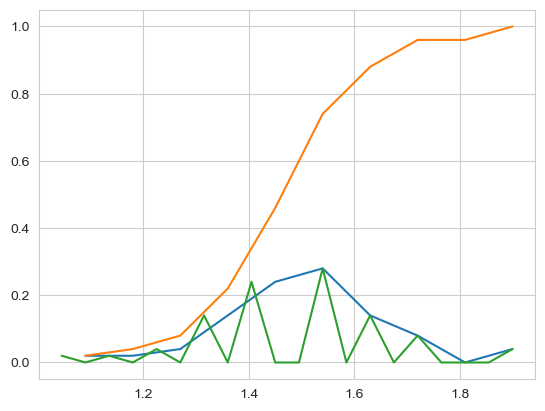

In [14]:
# Need for Cumulative Distribution Function (CDF)
# We can visually see what percentage of versicolor flowers have a 
#Plot CDF of PetalLengthCm

counts, bin_edges = np.histogram(iris_setosa['PetalLengthCm'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)


counts, bin_edges = np.histogram(iris_setosa['PetalLengthCm'], bins=20, 
                                 density = True)
pdf = counts/(sum(counts))
plt.plot(bin_edges[1:],pdf);

plt.show();


[0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]
[0.02 0.04 0.06 0.04 0.16 0.14 0.12 0.2  0.14 0.08]
[3.   3.21 3.42 3.63 3.84 4.05 4.26 4.47 4.68 4.89 5.1 ]
[0.02 0.1  0.24 0.08 0.18 0.16 0.1  0.04 0.02 0.06]
[4.5  4.74 4.98 5.22 5.46 5.7  5.94 6.18 6.42 6.66 6.9 ]


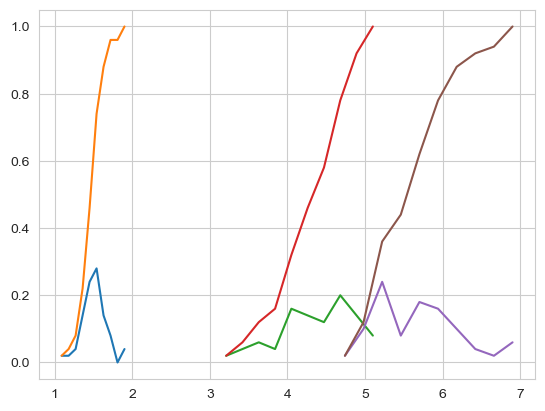

In [15]:
# Plots of CDF of petal_length for various types of flowers.

# Misclassification error if you use petal_length only.

counts, bin_edges = np.histogram(iris_setosa['PetalLengthCm'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


# virginica
counts, bin_edges = np.histogram(iris_virginica['PetalLengthCm'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


#versicolor
counts, bin_edges = np.histogram(iris_versicolor['PetalLengthCm'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


plt.show();

In [16]:
#Mean, Variance, Std-deviation,  
print("Means:")
print(np.mean(iris_setosa["PetalLengthCm"]))

#Mean with an outlier.
print(np.mean(np.append(iris_setosa["PetalLengthCm"],50)));
print(np.mean(iris_virginica["PetalLengthCm"]))
print(np.mean(iris_versicolor["PetalLengthCm"]))

print("\nStd-dev:");
print(np.std(iris_setosa["PetalLengthCm"]))
print(np.std(iris_virginica["PetalLengthCm"]))
print(np.std(iris_versicolor["PetalLengthCm"]))





Means:
1.464
2.4156862745098038
4.26
5.5520000000000005

Std-dev:
0.17176728442867115
0.4651881339845204
0.5463478745268441


In [17]:
#Median, Quantiles, Percentiles, IQR.
print("\nMedians:")
print(np.median(iris_setosa["PetalLengthCm"]))

#Median with an outlier
print(np.median(np.append(iris_setosa["PetalLengthCm"],50)));
print(np.median(iris_virginica["PetalLengthCm"]))
print(np.median(iris_versicolor["PetalLengthCm"]))


print("\nQuantiles:")
print(np.percentile(iris_setosa["PetalLengthCm"],np.arange(0, 100, 25)))
print(np.percentile(iris_virginica["PetalLengthCm"],np.arange(0, 100, 25)))
print(np.percentile(iris_versicolor["PetalLengthCm"], np.arange(0, 100, 25)))

print("\n90th Percentiles:")
print(np.percentile(iris_setosa["PetalLengthCm"],90))
print(np.percentile(iris_virginica["PetalLengthCm"],90))
print(np.percentile(iris_versicolor["PetalLengthCm"], 90))

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(iris_setosa["PetalLengthCm"]))
print(robust.mad(iris_virginica["PetalLengthCm"]))
print(robust.mad(iris_versicolor["PetalLengthCm"]))



Medians:
1.5
1.5
4.35
5.55

Quantiles:
[1.    1.4   1.5   1.575]
[3.   4.   4.35 4.6 ]
[4.5   5.1   5.55  5.875]

90th Percentiles:
1.7
4.8
6.31

Median Absolute Deviation
0.14826022185056031
0.5189107764769602
0.6671709983275211


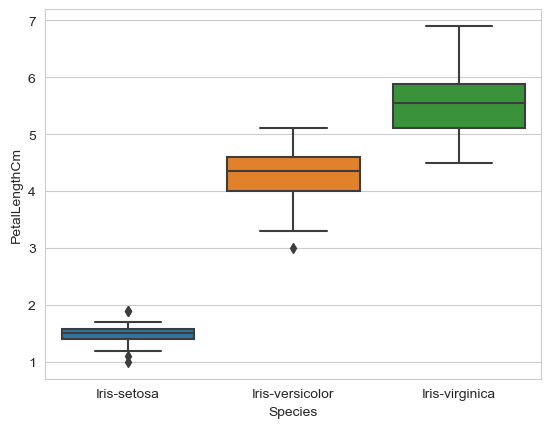

In [18]:

#Box-plot with whiskers: another method of visualizing the  1-D scatter plot more intuitivey.
# The Concept of median, percentile, quantile.
# How to draw the box in the box-plot?
# How to draw whiskers: [no standard way] Could use min and max or use other complex statistical techniques.
# IQR like idea.

#Box-plot can be visualized as a PDF on the side-ways.

sns.boxplot(x='Species',y='PetalLengthCm', data=df)
plt.show()

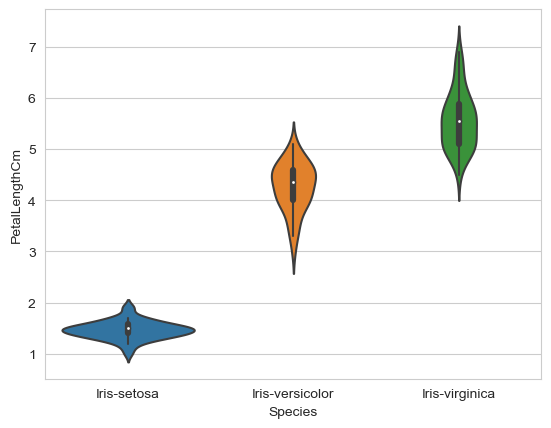

In [19]:
# A violin plot combines the benefits of the previous two plots 
#and simplifies them

# Denser regions of the data are fatter, and sparser ones thinner 
#in a violin plot

sns.violinplot(x="Species", y="PetalLengthCm", data=df, size=8)
plt.show()

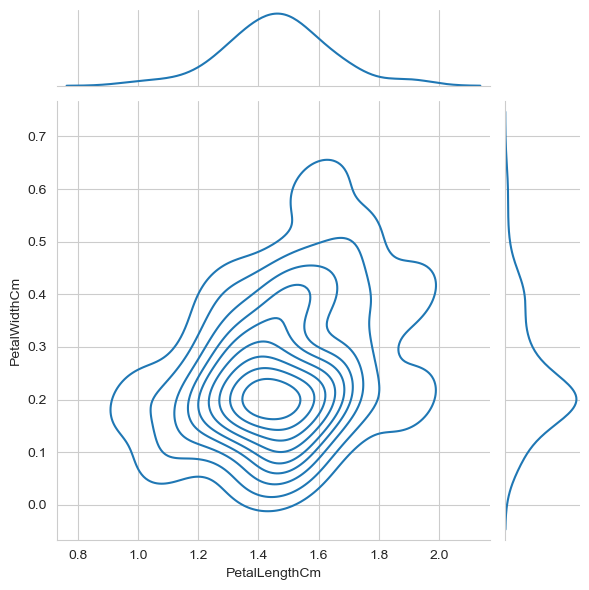

In [20]:
#2D Density plot, contors-plot
sns.jointplot(x="PetalLengthCm", y="PetalWidthCm", data=iris_setosa, kind="kde");
plt.show();


### Train and Test 

In [21]:
import pandas as pd
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()

# Create a DataFrame from the dataset
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Add the target variable
df['species'] = iris.target

# Display the first few rows of the DataFrame
print(df.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  


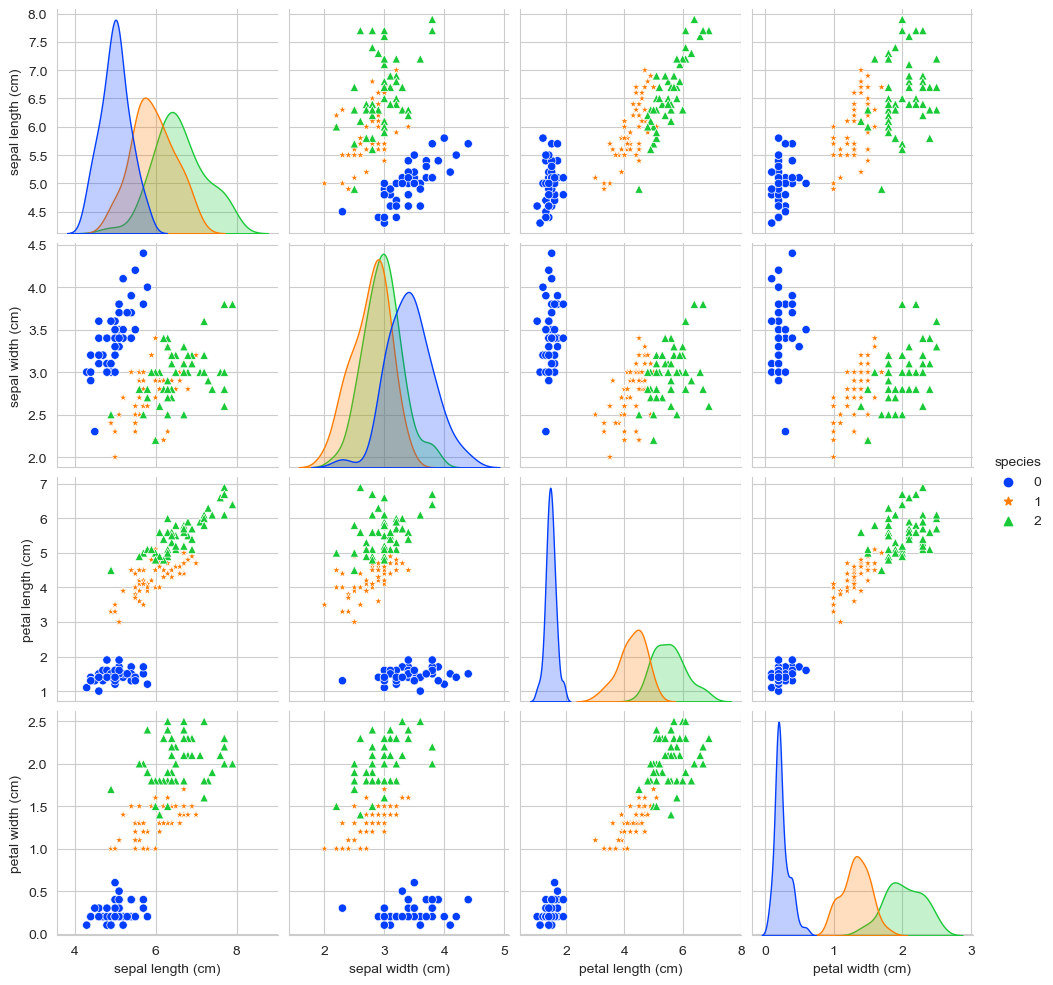

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt


custom_palette = sns.color_palette("bright") 
sns.pairplot(df, hue='species', markers=["o", "*", "^"], palette=custom_palette)  
plt.show()


In [23]:
# Summary statistics
print(df.describe())


       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)     species  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


In [24]:
from sklearn.model_selection import train_test_split

# Features and target variable
X = df.drop(columns='species')
y = df['species']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [25]:
from sklearn.svm import SVC

# Initialize the model
model = SVC(kernel='linear')

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)


In [26]:
from sklearn.metrics import classification_report, accuracy_score

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [27]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf', 'poly', 'sigmoid']}

# Initialize the grid search
grid_search = GridSearchCV(SVC(), param_grid, cv=5)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)


Best parameters: {'C': 1, 'kernel': 'linear'}
Best cross-validation score: 0.9583333333333334
